#📌 Extracão

In [1]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'


import pandas as pd
import json
import requests


df= requests.get(url)


resultado = json.loads(df.text)


df_n = pd.json_normalize(resultado,sep='_')


df_Telecom= pd.DataFrame(df_n)


df_Telecom = df_Telecom.drop_duplicates()


df_Telecom.tail(5)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


#🔧 Transformação

In [2]:
df_Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [3]:
df_Telecom.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


In [4]:
pd.unique(df_Telecom['customerID'])

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

In [5]:
import numpy as np


df_Telecom['account_Contract'] = df_Telecom['account_Contract'].str.replace('-', ' ', regex=True)


df_Telecom['account_PaymentMethod'] = df_Telecom['account_PaymentMethod'].str.replace('(automatic)', '', regex=True)


df_Telecom['account_PaymentMethod'] = df_Telecom['account_PaymentMethod'].str.replace('[()]', '', regex=True)


df_Telecom['account_Charges_Total'] = df_Telecom['account_Charges_Total'].apply(lambda x: x.replace(' ', '').replace(',', '.').strip())


df_Telecom['account_Charges_Total'] = df_Telecom['account_Charges_Total'].replace('', '0')


df_Telecom['account_Charges_Total']= df_Telecom['account_Charges_Total'].astype(np.float64)


numericos = ['customer_tenure', 'customer_SeniorCitizen']
df_Telecom[numericos]= df_Telecom[numericos].astype(np.int64)


df_Telecom.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month to month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month to month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month to month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month to month,Yes,Mailed check,83.9,267.40


In [9]:
df_Telecom['Contas_Diarias'] = df_Telecom['account_Charges_Monthly']/30



In [8]:
df_Telecom.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month to month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month to month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month to month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month to month,Yes,Mailed check,83.9,267.40,2.796667


#📊 Carga e análise

In [10]:
df_Telecom.describe()

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035,2.157337
std,0.369074,24.571773,30.129572,2268.648587,1.004319
min,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,35.425000,396.200000,1.180833
50%,0.000000,29.000000,70.300000,1389.200000,2.343333
75%,0.000000,55.000000,89.875000,3778.525000,2.995833
max,1.000000,72.000000,118.750000,8684.800000,3.958333


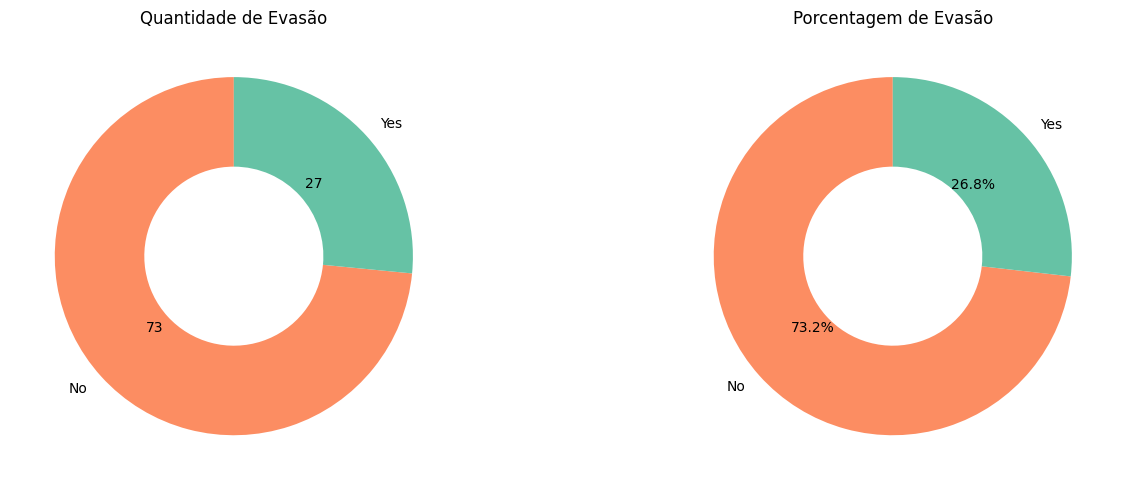

In [11]:


import matplotlib.pyplot as plt


df_evasão =df_Telecom.groupby('Churn')[['customerID']].count()


Total_Clientes = df_evasão['customerID'].sum()


df_evasão['Porcentagem'] = round((df_evasão['customerID']/Total_Clientes)*100)


df_evasão = df_evasão.query('Churn == "Yes" | Churn == "No"')



fig, axs = plt.subplots(1, 2, figsize=(14, 5))
fig.subplots_adjust(wspace=0.4)

cores = ['#fc8d62', '#66c2a5']

axs[0].pie(
    df_evasão['customerID'],
    labels=df_evasão.index,
    autopct='%1.0f',
    startangle=90,
    colors=cores,
    wedgeprops={'width': 0.5}
)
axs[0].set_title('Quantidade de Evasão')

axs[1].pie(
    df_evasão['Porcentagem'],
    labels=df_evasão.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores,
    wedgeprops={'width': 0.5}
)
axs[1].set_title('Porcentagem de Evasão')

plt.tight_layout()
plt.show()



In [12]:
df_Evasão_Genero =df_Telecom.groupby(['Churn','customer_gender'])[['customerID']].count()


In [13]:
df_Evasão_Genero = df_Evasão_Genero.reset_index()

In [14]:
df_Evasão_Genero = df_Evasão_Genero.query('Churn == "Yes" | Churn == "No"')

In [15]:
soma_genero = df_Evasão_Genero.groupby('customer_gender')[['customerID']].sum()
soma_genero

,customerID
customer_gender,
Female,3488
Male,3555


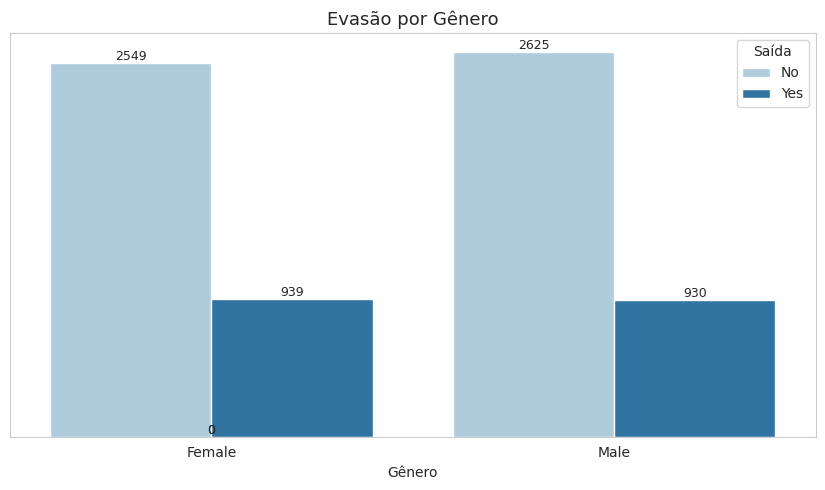

In [16]:
import seaborn as sns

plt.figure(figsize=(9,5))
sns.set_style("whitegrid")

ax = sns.barplot(data=df_Evasão_Genero, x='customer_gender', y='customerID', hue='Churn', palette='Paired')

plt.title('Evasão por Gênero', fontsize=13)
plt.xlabel('Gênero')
plt.ylabel('Número de Clientes')
plt.legend(title='Saída')
plt.tight_layout()

for barra in ax.patches:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width()/2,
        altura + 1,
        f'{int(altura)}',
        ha='center', va='bottom', fontsize=9
    )
    ax.get_yaxis().set_visible(False)
    plt.grid('')

plt.show()

In [17]:
df_Telecom.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month to month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month to month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month to month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month to month,Yes,Mailed check,83.9,267.40,2.796667


In [18]:
df_Evasão_Categorias =df_Telecom.groupby(['Churn','account_Contract', 'account_PaymentMethod'])[['customerID']].count()

In [19]:
df_Evasão_Categorias = df_Evasão_Categorias.query('Churn == "Yes" | Churn == "No"')

In [20]:
df_Evasão_Categorias = df_Evasão_Categorias.reset_index()

In [21]:
df_Evasão_Categorias.head()

,Churn,account_Contract,account_PaymentMethod,customerID
0,No,Month to month,Bank transfer,388
1,No,Month to month,Credit card,365
2,No,Month to month,Electronic check,856
3,No,Month to month,Mailed check,611
4,No,One year,Bank transfer,353


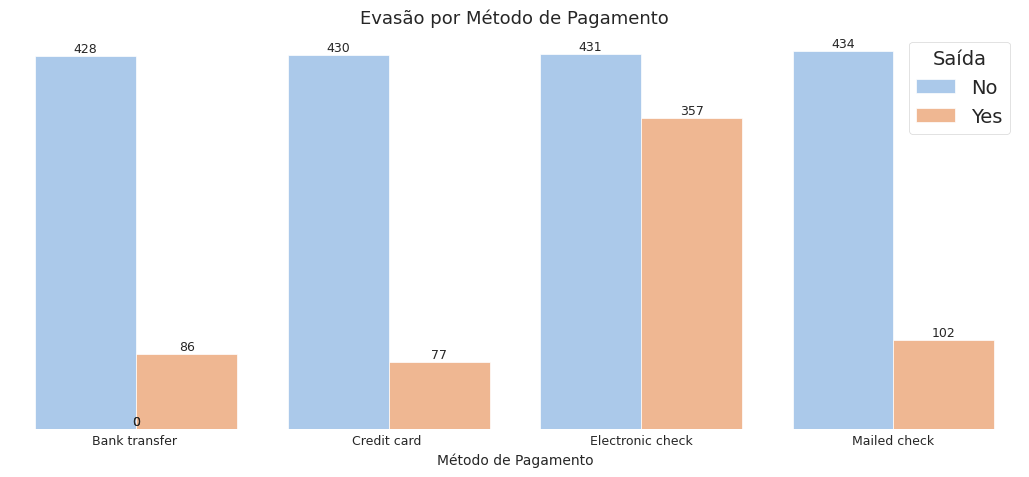

In [22]:
plt.figure(figsize=(11,5))
plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")

ax = sns.barplot(data=df_Evasão_Categorias, x='account_PaymentMethod', y='customerID', hue='Churn', errorbar=None, palette= 'pastel')

plt.title('Evasão por Método de Pagamento', fontsize=13)
plt.xlabel('Método de Pagamento', fontsize =10)
plt.ylabel('Número de Clientes', fontsize =10)
ax.xaxis.set_tick_params(labelsize=9)
ax.yaxis.set_tick_params(labelsize=9)
plt.legend(title='Saída')
plt.tight_layout()
ax.spines['top'].set_visible(False) #tirar a borda superior
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
for barra in ax.patches:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width()/2,
        altura + 1,
        f'{int(altura)}',
        ha='center', va='bottom', fontsize=9
    )
    ax.get_yaxis().set_visible(False)


plt.show()

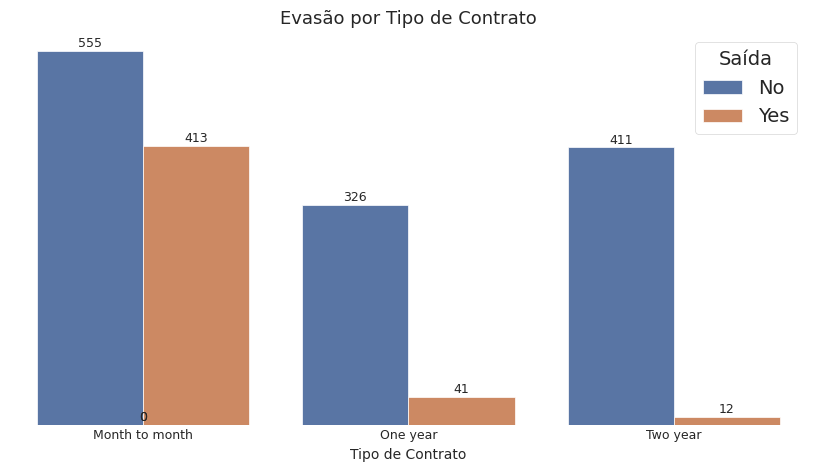

In [23]:
plt.figure(figsize=(9,5))
sns.set_style("whitegrid")

ax = sns.barplot(data=df_Evasão_Categorias, x='account_Contract', y='customerID', hue='Churn', errorbar=None, palette='deep')

plt.title('Evasão por Tipo de Contrato', fontsize=13)
plt.xlabel('Tipo de Contrato',fontsize=10)
plt.ylabel('Número de Clientes', fontsize=10)
plt.legend(title='Saída')
plt.tight_layout()
ax.xaxis.set_tick_params(labelsize=9)
ax.yaxis.set_tick_params(labelsize=9)
ax.spines['top'].set_visible(False) #tirar a borda superior
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

for barra in ax.patches:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width()/2,
        altura + 1,
        f'{int(altura)}',
        ha='center', va='bottom', fontsize=9
    )
    ax.get_yaxis().set_visible(False)


plt.show()

In [26]:
df_Evasão_Idade =df_Telecom.groupby(['Churn','customer_SeniorCitizen'])[['customerID']].count()


df_Evasão_Idade = df_Evasão_Idade.query('Churn == "Yes" | Churn == "No"')


df_Evasão_Idade = df_Evasão_Idade.reset_index()


df_Evasão_Idade['customer_SeniorCitizen'] = df_Evasão_Idade['customer_SeniorCitizen'].apply(lambda x: 'Idoso' if x == 1 else 'Não Idoso')


df_Evasão_Idade


,Churn,customer_SeniorCitizen,customerID
0,No,Não Idoso,4508
1,No,Idoso,666
2,Yes,Não Idoso,1393
3,Yes,Idoso,476


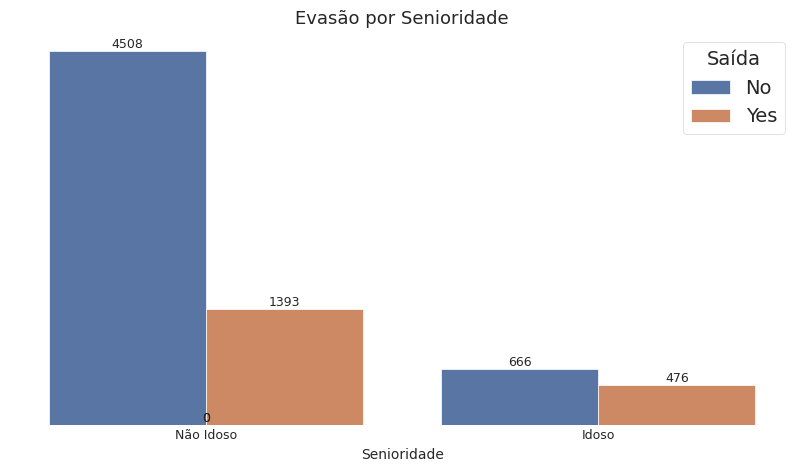

In [27]:
plt.figure(figsize=(9,5))
sns.set_style("whitegrid")

ax = sns.barplot(data=df_Evasão_Idade, x='customer_SeniorCitizen', y='customerID', hue='Churn', errorbar=None, palette='deep')

plt.title('Evasão por Senioridade', fontsize=13)
plt.xlabel('Senioridade',fontsize=10)
plt.ylabel('Número de Clientes', fontsize=10)
plt.legend(title='Saída')
plt.tight_layout()
ax.xaxis.set_tick_params(labelsize=9)
ax.yaxis.set_tick_params(labelsize=9)
ax.spines['top'].set_visible(False) #tirar a borda superior
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

for barra in ax.patches:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width()/2,
        altura + 1,
        f'{int(altura)}',
        ha='center', va='bottom', fontsize=9
    )
    ax.get_yaxis().set_visible(False)

In [28]:
df_Evasão_Total =df_Telecom.groupby(['Churn','account_Charges_Total','customer_tenure'])[['customerID']].count()

df_Evasão_Total = df_Evasão_Total.query('Churn == "Yes" | Churn == "No"')

df_Evasão_Total = df_Evasão_Total.reset_index()

df_Evasão_Total


,Churn,account_Charges_Total,customer_tenure,customerID
0,No,0.00,0,11
1,No,18.80,1,1
2,No,18.85,1,1
3,No,18.90,1,1
4,No,19.00,1,1
...,...,...,...,...
6826,Yes,7856.00,68,1
6827,Yes,7968.85,70,1
6828,Yes,8109.80,72,1
6829,Yes,8127.60,70,1


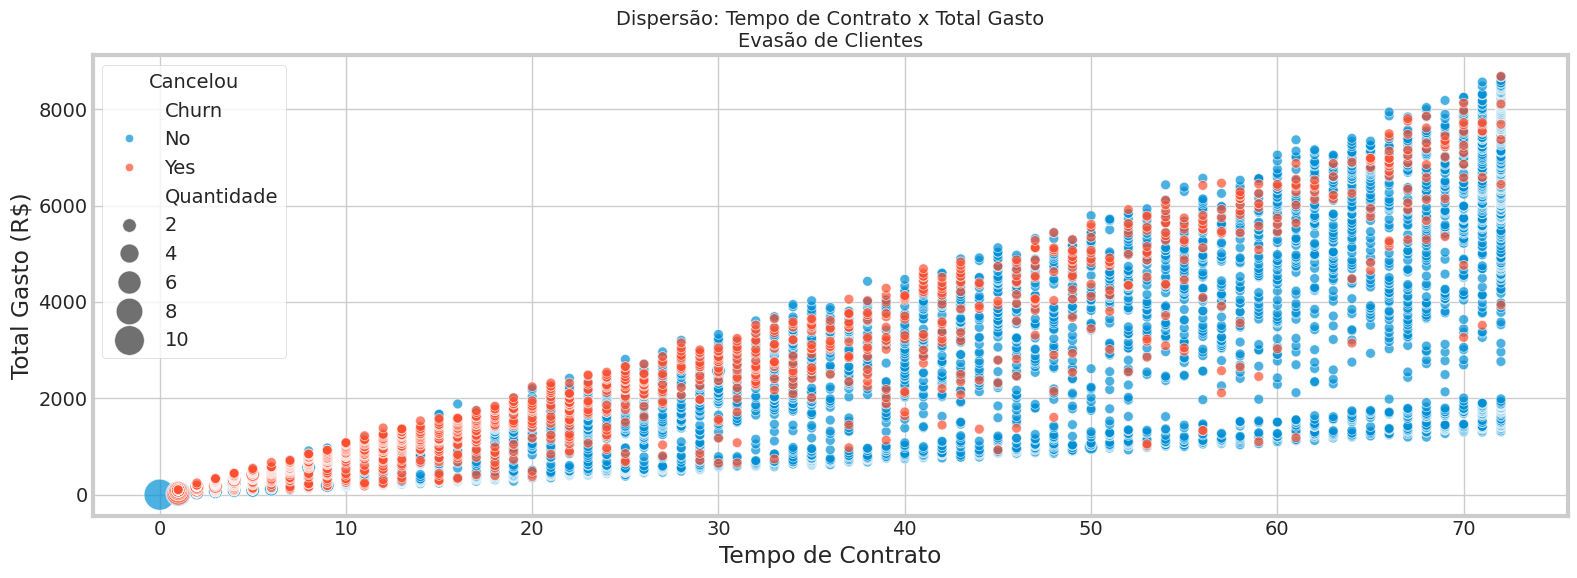

In [29]:
df_Evasão_Total.rename(columns={'customerID': 'Quantidade'}, inplace=True)

plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")

sns.scatterplot(
    data=df_Evasão_Total,
    x='customer_tenure',
    y='account_Charges_Total',
    size='Quantidade',
    hue='Churn',
    sizes=(50, 500),     # Escala dos tamanhos dos pontos
    alpha=0.7            # Transparência para sobreposição
)

plt.title('Dispersão: Tempo de Contrato x Total Gasto\nEvasão de Clientes', fontsize=14)
plt.xlabel('Tempo de Contrato')
plt.ylabel('Total Gasto (R$)')
plt.legend(title='Cancelou')
plt.tight_layout()

plt.show()

In [30]:
df_Telecom.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month to month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month to month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month to month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month to month,Yes,Mailed check,83.9,267.40,2.796667


In [31]:
df_Evasão_diaria =df_Telecom.groupby(['Churn','Contas_Diarias','account_Charges_Monthly'])[['customerID']].count()

df_Evasão_diaria = df_Evasão_diaria.query('Churn == "Yes" | Churn == "No"')

df_Evasão_diaria = df_Evasão_diaria.reset_index()

df_Evasão_diaria


,Churn,Contas_Diarias,account_Charges_Monthly,customerID
0,No,0.608333,18.25,1
1,No,0.613333,18.40,1
2,No,0.618333,18.55,1
3,No,0.623333,18.70,2
4,No,0.625000,18.75,1
...,...,...,...,...
2365,Yes,3.855000,115.65,1
2366,Yes,3.873333,116.20,1
2367,Yes,3.915000,117.45,1
2368,Yes,3.926667,117.80,1


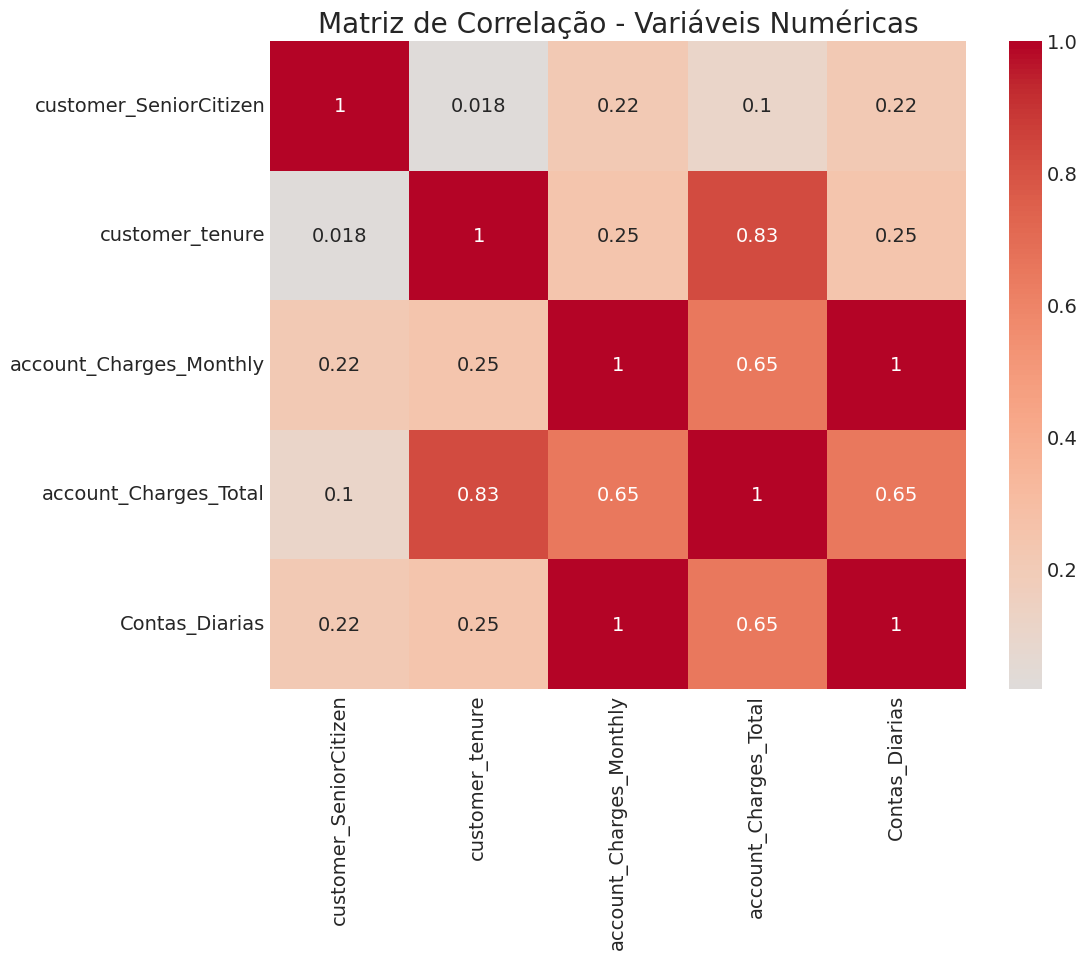

In [32]:
colunas_numericas = df_Telecom.select_dtypes(include=['float64', 'int64']).columns


plt.figure(figsize=(10, 8))
sns.heatmap(df_Telecom[colunas_numericas].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.show()

#📄Relatorio Final

A evasão de clientes, é um dos maiores desafios para empresas do setor de telecomunicações, clientes que cancelam seus contratos representam perda de receita e aumento de custos para aquisição de novos consumidores.

Foi observado a existência de alguns dados ausentes.

Variáveis do TotalCharges foram convertidas de texto para float.

Na distribuição de Evasão (Churn) , aproximadamente 27% dos clientes cancelaram os serviços.

Clientes com contrato mensal, têm a maior taxa de evasão, enquanto contratos anuais ou de dois anos possuem taxas muito menores.

Clientes que não contratam serviços adicionais são mais propensos a cancelar.

Clientes com fatura mensal mais alta tendem a permanecer mais tempo.

Entre tempo de contrato (customer_tenure) e gasto total (account_Charges_Total) é muito alta (0.83).

Clientes que usam serviços mensais, têm baixo tempo de contrato e menor gasto acumulado.

Gráficos de dispersão mostra que a evasão se concentra em clientes com baixo tempo de contrato.

Clientes de contrato mensal são os mais propensos a cancelar.

Gasto mensal não tem uma correlação direta com o churn.

Variáveis como SeniorCitizen não possuem impacto relevante no churn.


Campanhas para migração de clientes de contrato mensal para anual ou bienal podem reduzir significativamente a evasão.
